In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Load dataset

In [2]:
df_telco = pd.read_csv('telco_customer_churn.csv', header=0)

# Identify categorical and numeric columns

In [3]:
df_telco.drop(columns=['CustomerID'], inplace=True)

In [4]:
# Store categorical column names
categorical = df_telco.nunique()[df_telco.nunique() < 5].keys().tolist()
categorical.remove('Churn')


In [5]:
# Store numerical column names
numerical = [x for x in df_telco.columns if x not in categorical]
numerical.remove('Churn')


In [6]:
df_telco_encoded = pd.get_dummies(data=df_telco, columns=categorical, drop_first=True)

# Correlations

In [7]:
# df_telco_encoded.corr().iloc[7:25, 7:25]

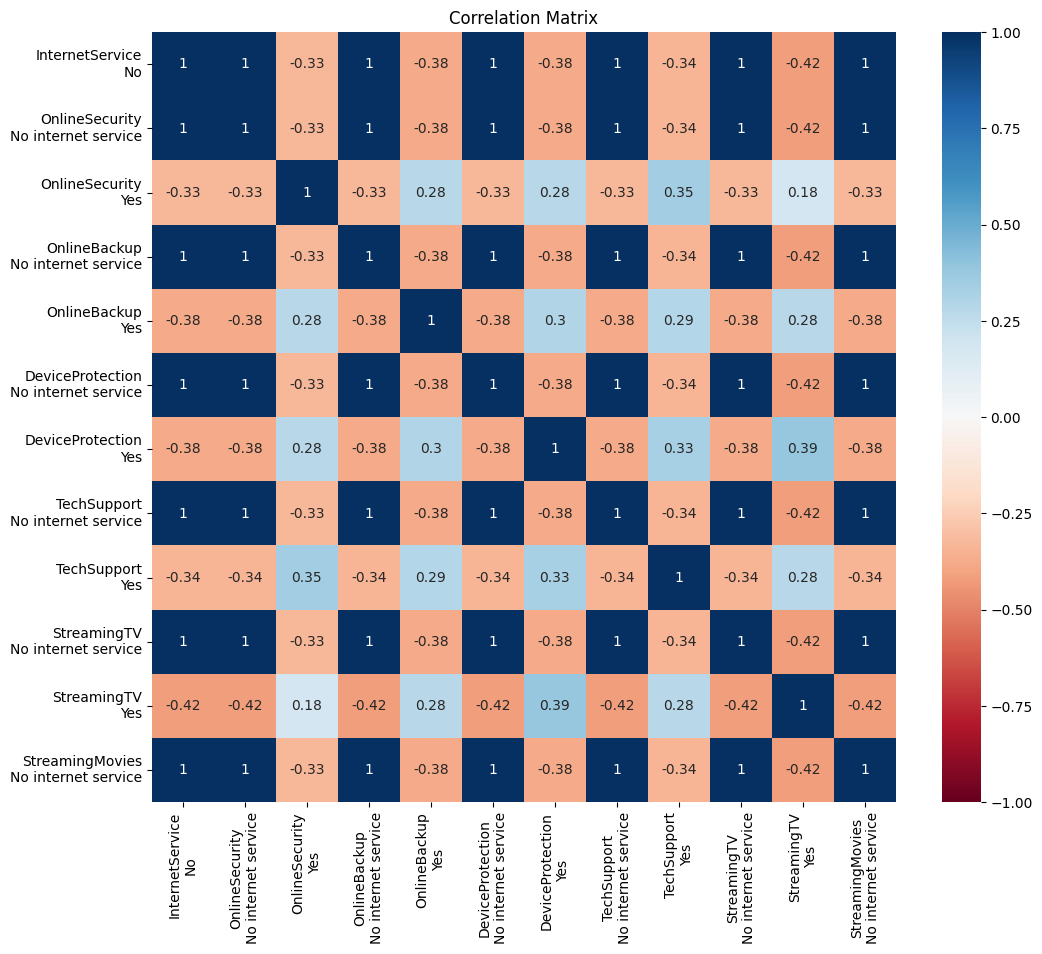

In [8]:
def wrap_axis_labels(ticklabel):
    return [x.get_text().replace('_', '\n') for x in ticklabel]

plt.figure(figsize=(8, 6))

# Only plotting the columns where the correlations are very high
s = sns.heatmap(df_telco_encoded.corr().iloc[12:24, 12:24].round(2),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)

s.set_xticklabels(wrap_axis_labels(s.get_xticklabels()), rotation=90)
s.set_yticklabels(wrap_axis_labels(s.get_yticklabels()), rotation=0)

plt.title('Correlation Matrix')
# plt.savefig('output/output.png')
plt.show()

### Remove redundant features

In [9]:
corr_cols = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'MultipleLines_No phone service'
]
df_telco_encoded.drop(columns=corr_cols, inplace=True)
print(df_telco_encoded.columns.tolist())

['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
